## Exercise 4
3)

Loading dataset and remove rows with null values:

In [2]:
import pandas as pd
from IPython.core.display import display

titanic = pd.read_csv('titanic.csv')
display(titanic.head(8))
titanic = titanic[titanic['Age'].notnull()]
titanic['Sex'] = pd.Categorical(titanic['Sex'].factorize()[0])
display(titanic.head(8))

,Survived,Sex,Age,Class
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3
5,0,male,NaN,3
6,0,male,54.0,1
7,0,male,2.0,3


,Survived,Sex,Age,Class
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3
6,0,0,54.0,1
7,0,0,2.0,3
8,1,1,27.0,3


Making a decision tree and displaying it with Graphviz.

Only the top 3 layers of the tree shown since the image becomes too big otherwise.

Sex = 0 for male, 1 for female

0        died
1    survived
2    survived
3    survived
4        died
dtype: object


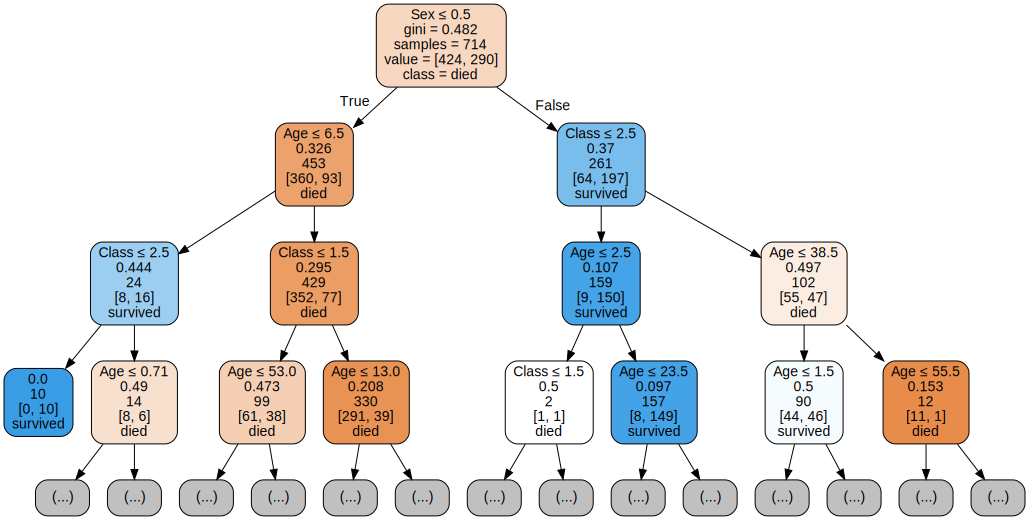

In [36]:
from sklearn import tree
from graphviz import Source
import numpy as np
from IPython.display import SVG

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

survived = pd.Series(np.where(y == 0, 'died', 'survived'))
print(survived.head())

clf = tree.DecisionTreeClassifier().fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=survived,
                                filled=True, rounded=True,
                                max_depth=3, label='root',
                                special_characters=True)
graph = Source(dot_data)
SVG(graph.pipe(format='svg'))